In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
!pip install pmdarima

In [4]:
monthly_data = pd.read_excel('Forecasting Assignment Data.xlsx',index_col=[1],parse_dates=True)

In [5]:
monthly_data.columns

Index(['Dates', 'Index for Sarimax', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi',
       'UP', 'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh',
       'Gujarat', 'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh',
       'Telangana', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar',
       'Jharkhand', 'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh',
       'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

In [6]:
monthly_data=monthly_data.filter(['UP'], axis=1)

In [7]:
monthly_data.tail()

UP
Daily date       
2020-05-14  322.8
2020-05-15  331.4
2020-05-16  336.7
2020-05-17  334.6
2020-05-18  287.3

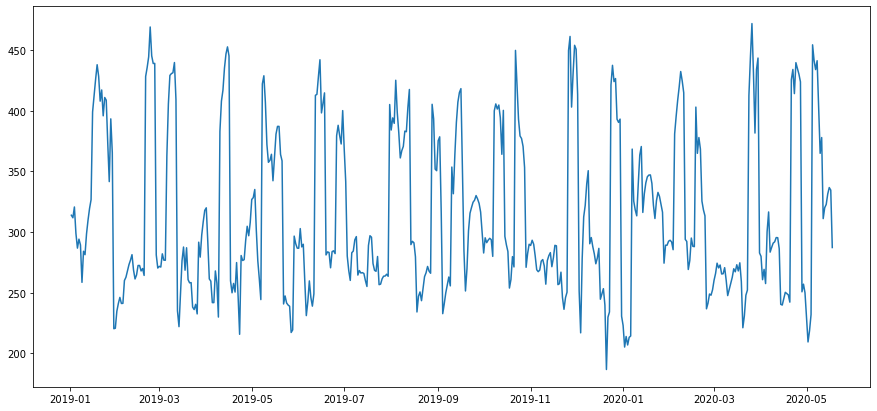

In [8]:
plt.figure(figsize=(15,7))
plt.plot(monthly_data)

In [9]:
day_new=np.arange(1,504)

In [10]:
q_ts = monthly_data

<AxesSubplot:xlabel='Daily date', ylabel='residual'>

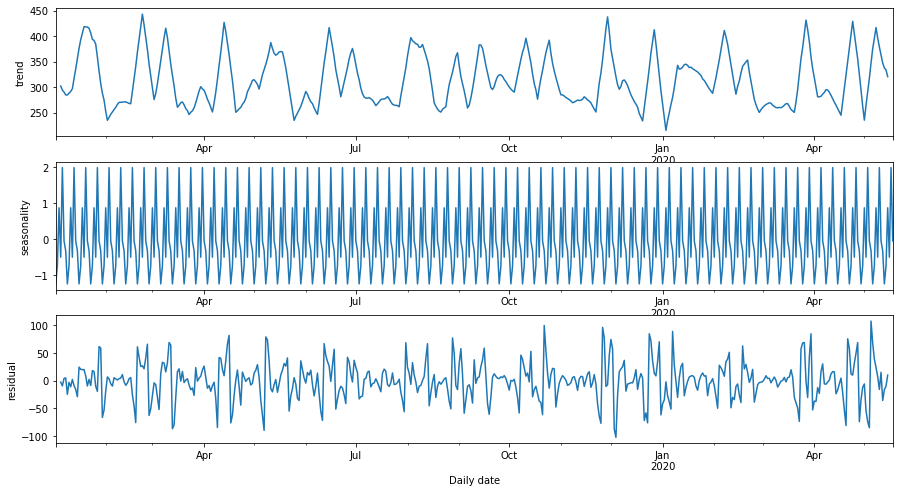

In [11]:
#Checking the trend and seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(q_ts, model='additive')
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
result.trend.plot(ax=ax1,ylabel = "trend")
result.seasonal.plot(ax=ax2,ylabel = "seasonality")
result.resid.plot(ax=ax3,ylabel = "residual")

In [12]:
#Checking the stationarity of the ts using Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
res = adfuller(q_ts.values.squeeze(),autolag = 'AIC')
dfoutput = pd.Series(res[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in res[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -6.718484e+00
p-value                        3.532079e-09
#Lags Used                     8.000000e+00
Number of Observations Used    4.940000e+02
Critical Value (1%)           -3.443657e+00
Critical Value (5%)           -2.867408e+00
Critical Value (10%)          -2.569896e+00
dtype: float64


In [13]:
len(q_ts)

503

In [14]:
train_qts=q_ts[:497]
test_qts=q_ts[497:]

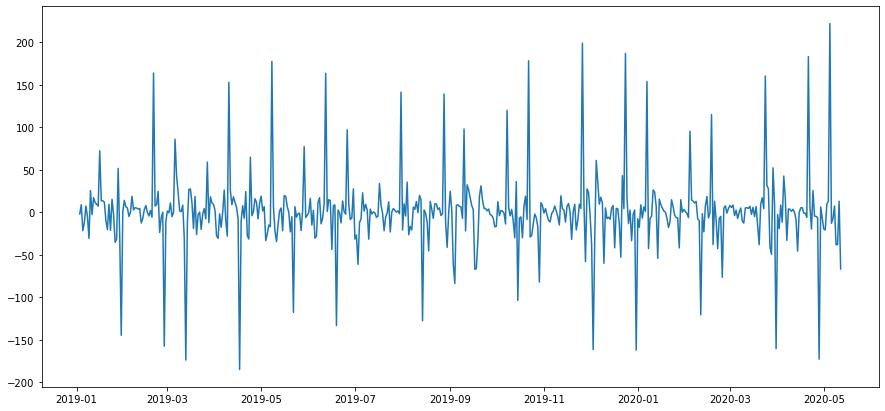

In [15]:
#Differenced version of our ts
lagged_qts = train_qts.diff()
plt.figure(figsize = (15,7))
plt.plot(lagged_qts)

In [16]:
import pmdarima
model = pmdarima.auto_arima(q_ts['UP'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      seasonal = True,
                      max_p = 5,
                      max_q = 5,
                      max_P = 5,
                      max_Q = 5,
                      start_P=0, 
                      D=1, 
                      start_Q = 0,
                      m = 4,
                      stepwise=True,
                      error_action = 'ignore',
                      suppress_warnings = True)
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  503
Model:             SARIMAX(2, 0, 0)x(5, 1, 0, 4)   Log Likelihood               -2592.334
Date:                           Wed, 27 Jul 2022   AIC                           5200.668
Time:                                   14:59:46   BIC                           5234.369
Sample:                                        0   HQIC                          5213.893
                                           - 503                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0197      0.076     13.429      0.000       0.871       1.168
ar.L2         -0.2382      0.072     -3.319

In [28]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train_qts,order=(2,0,0),seasonal_order=(5,1,0,4))
model_fit = model.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [29]:
predictions = model_fit.forecast(90)
predictions

2020-05-13    345.074697
2020-05-14    315.728969
2020-05-15    349.440360
2020-05-16    350.291916
2020-05-17    376.869061
                 ...    
2020-08-06    334.156227
2020-08-07    348.450297
2020-08-08    334.075197
2020-08-09    371.483942
2020-08-10    334.130497
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

In [30]:
next_90_predictions = np.array(predictions)

In [31]:
next_90_predictions

array([345.07469665, 315.72896924, 349.44036036, 350.29191599,
       376.86906076, 335.88611331, 345.89842781, 330.32640865,
       363.78137544, 314.92075931, 329.15925678, 319.30273753,
       364.99709846, 333.03276477, 344.80827564, 333.5861936 ,
       383.13087725, 347.28067224, 359.86921211, 343.43445038,
       370.82916832, 334.01214967, 349.87102217, 331.54447265,
       369.50832556, 332.47198257, 348.20466335, 335.94224317,
       371.53841193, 332.900823  , 346.54018918, 332.03162173,
       370.24400345, 332.33184685, 346.52453622, 332.97764854,
       371.93804498, 335.33078742, 349.22769906, 334.8279894 ,
       372.53137417, 335.26397454, 349.58750581, 334.7433779 ,
       371.11806261, 333.84289943, 348.39503803, 333.84576271,
       371.34655056, 333.90051353, 348.25730035, 334.13005331,
       371.39902582, 333.89121642, 348.10047984, 333.74837287,
       371.41654566, 334.08649203, 348.3515676 , 334.07101485,
       371.62150452, 334.34829723, 348.60825619, 334.18

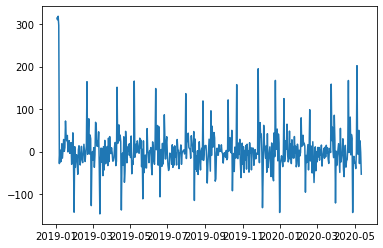

In [32]:
plt.plot(model_fit.resid)

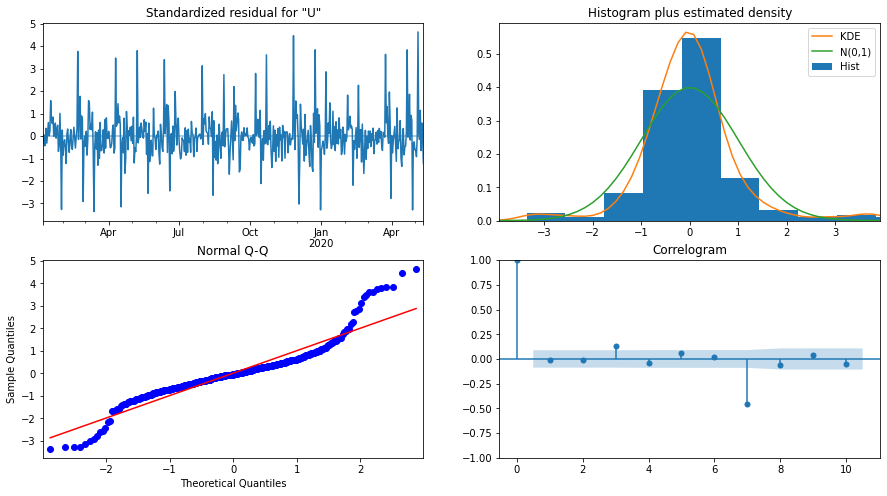

In [33]:
fig = model_fit.plot_diagnostics(figsize = (15,8))
plt.show()

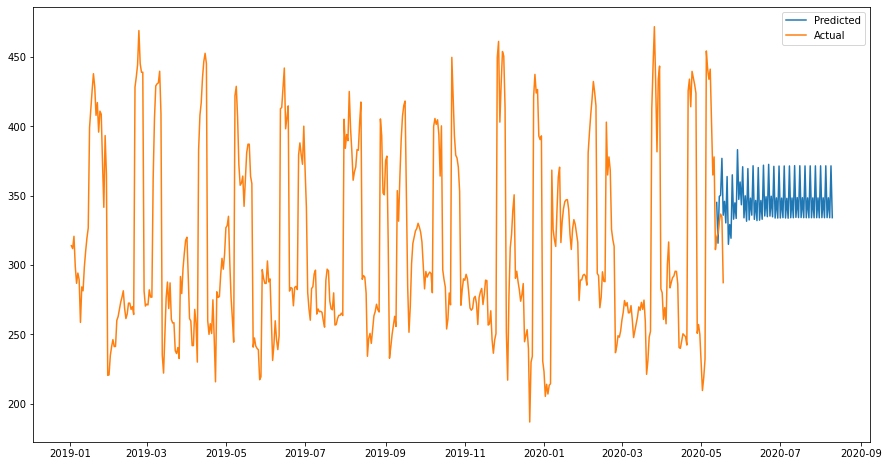

In [34]:
plt.figure(figsize = (15,8))
plt.plot(predictions, label = "Predicted")
plt.plot(q_ts,label = 'Actual')
plt.legend(loc = 'best')

In [35]:
sarimax = model_fit.fittedvalues

In [36]:
sarimax=np.array(sarimax)

In [37]:
q_ts_array=np.array(q_ts)

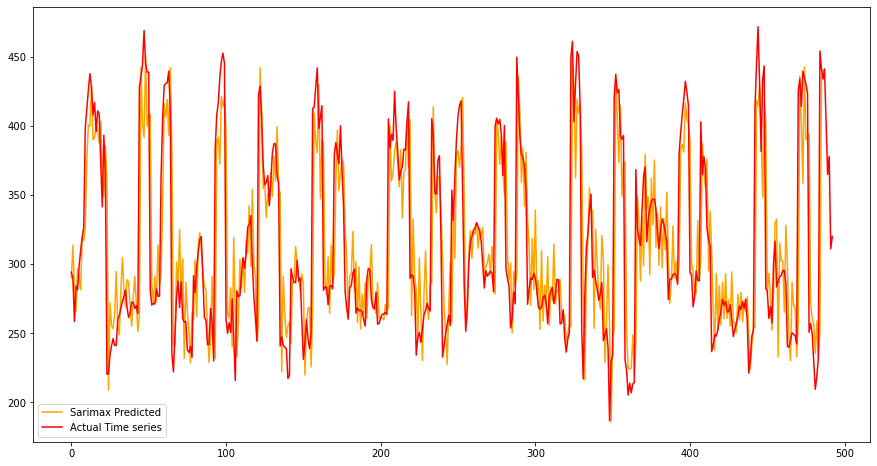

In [38]:
#Plotting and comparing the results
plt.figure(figsize = (15,8))
plt.plot(sarimax[5:-5], label = "Sarimax Predicted",color = 'orange')
plt.plot(q_ts_array[5:-5],label = 'Actual Time series',color = 'Red')
plt.legend(loc = 'best')